<a href="https://colab.research.google.com/github/laugh12321/neural-style/blob/master/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/laugh12321/neural-style.git

Cloning into 'neural-style'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 7), reused 6 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [0]:
dir_path = "neural-style"
NETWORK = 'neural_style_transfer' + '.py'

In [3]:
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: neural_style_transfer.py [-h] [--iter ITER]
                                [--content_weight CONTENT_WEIGHT]
                                [--style_weight STYLE_WEIGHT]
                                [--tv_weight TV_WEIGHT]
                                [--image_size IMAGE_SIZE]
                                base ref res_prefix

基于 Keras 的图像风格迁移

positional arguments:
  base                  基准图片的位置
  ref                   目标风格图片的位置
  res_prefix            Prefix for the saved results.

optional arguments:
  -h, --help            show this help message and exit
  --iter ITER           迭代次数
  --content_weight CONTENT_WEIGHT
                        Content weight.
  --style_weight STYLE_WEIGHT
                        Style weight.
  --tv_weight TV_WEIGHT
                        Total Variation weight.
  --image_size IMAGE_SIZE
                        Minimum image size


In [0]:
# Image size
IMAGE_SIZE = 400

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0

# Training arguments
NUM_ITERATIONS = 10

In [5]:

from google.colab import files

content_img = files.upload()

Saving target.jpg to target.jpg


In [6]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : target.jpg


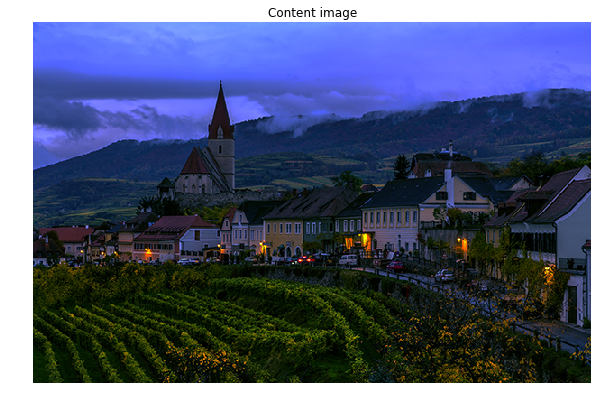

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

In [8]:
style_img = files.upload()

Saving sample.jpg to sample.jpg


In [9]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : sample.jpg


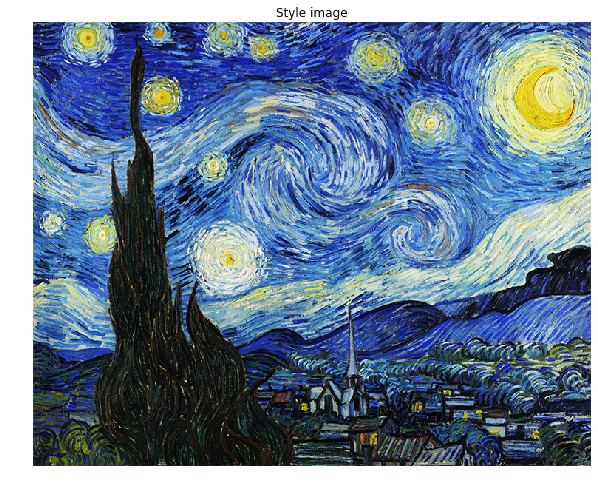

In [10]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

In [0]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [12]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --iter {NUM_ITERATIONS} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --tv_weight {STYLE_SCALE} --image_size {IMAGE_SIZE}

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-04-16 03:35:05.590696: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-16 03:35:05.590981: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x54c8dc0 executing computations on platform Host. Devices:
2019-04-16 03:35:05.591039: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-16 03:35:05.766698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-16 03:35:05.767266: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x54c9080 executing computations on platform CUDA. Devices:
2019-04-16 03:35:05.767332: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla T4, Compute Capability

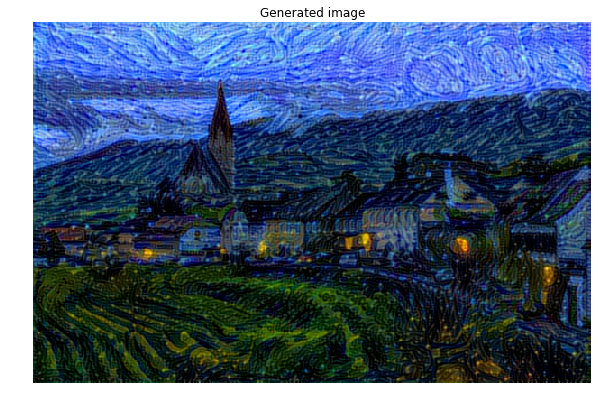

In [13]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

In [0]:
files.download(FINAL_IMAGE_PATH)